# Teorema Central do Limite

### Amostras aleatórias

Definição: Uma amostra aleatória simples de tamanho n da variável aleatória X, com uma dada distribuição de probabilidades, é o conjunto de variáveis aleatórias independentes $X_1,X_2, \ldots, X_n$, cada uma com a mesma distribuição de $X$.

Podemos gerar amostras aleatórias a partir de uma população com uma dada distribuição de probabilidade. Vamos supor que a população segue uma distribuição normal com média $\mu$ e desvio padrão $\sigma$. Gerando $n$ amostras de tamanho $m$.

In [136]:
import numpy as np
mu = 0
sigma = 1
n = 3
m = 4
for i in range(0,n):
    X = np.random.normal(mu, sigma,m)
    print('Amostra', i, ':', X)

Amostra 0 : [ 0.69093317 -0.31370503 -0.89482303 -1.05808148]
Amostra 1 : [ 1.03816766  0.75797423 -0.20319623 -0.19332442]
Amostra 2 : [ 1.0989767  -0.63592233 -1.40080664  0.06790928]


Teorema: Seja $X$ uma variável aleatória com esperança $E[X] = \mu$ e variância $V(X) = \sigma^2$. Seja $\bar{X}$ a média amostral de uma amostra de tamanho $n$. Então:
$$
E[\bar{X}]= \mu, \quad V(\bar{X})=\frac{\sigma^2}{n}.
$$

Vamos verificar esse teorema através de simulações:

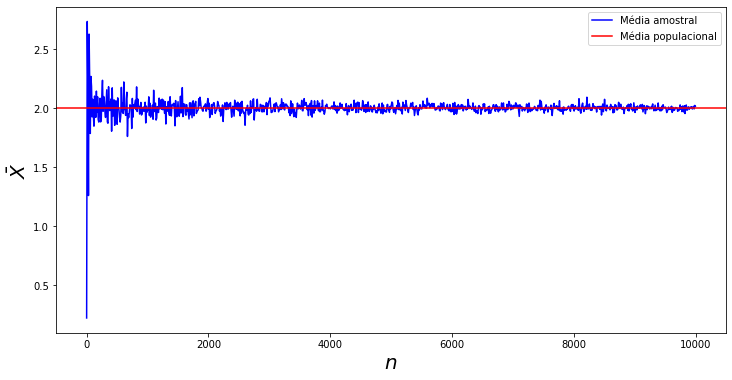

In [142]:
vn = []
vmean = []
mu = 2
std = 1
for n in np.arange(1,10000,10):
    #X = np.random.normal(mu,std, n) # X is generated from a normal distribution
    X = np.random.exponential(mu, n) # X is generated from an exponential probability distribution
    vmean.append(np.mean(X))
    vn.append(n)
plt.figure(figsize=(12,6))
plt.plot(vn, vmean, '-', color='blue', label='Média amostral')
plt.axhline(y=mu, color='r', linestyle='-', label = 'Média populacional')
plt.xlabel(r'$n$', fontsize=20)
plt.ylabel(r'$\bar{X}$', fontsize=20)
plt.legend()
plt.show(True)

Notamos que a média amostral converge para a média populacional $\mu$ quando aumentamos o tamanho da amostra.

## Teorema Central do Limite

**Teorema:** Seja $(X_1,X_2,\ldots,X_n)$ uma amostra da população X com média $\mu$ e variância $\sigma^2$ finita. Então:
$$
    Z = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}} \sim \mathcal{N}(\mu=0,\,\sigma^{2}=1)
$$

Vamos verificar esse teorema através de simulações:

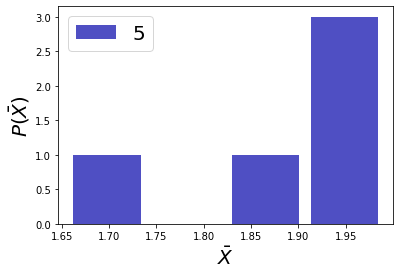

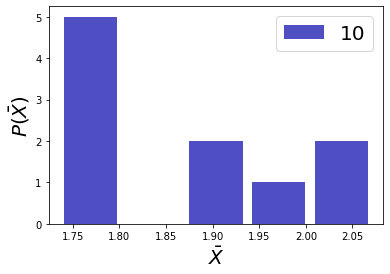

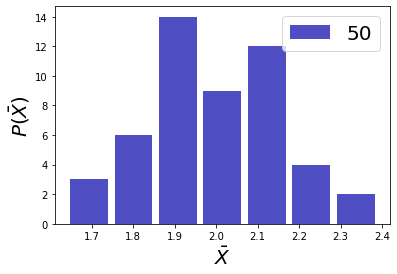

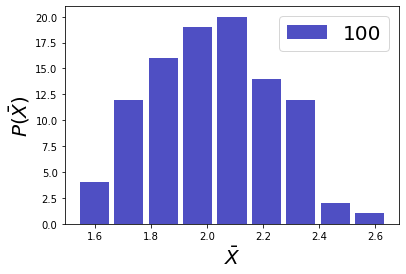

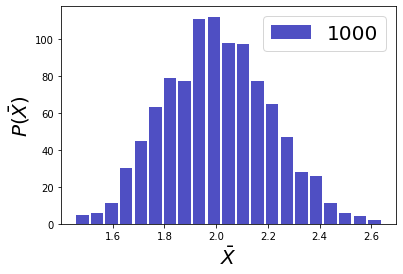

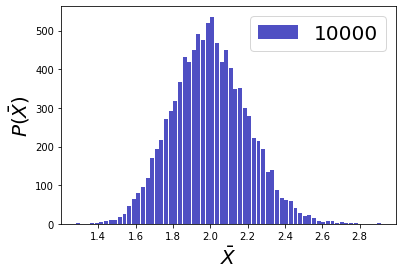

In [145]:
vNs =  [5, 10 , 50, 100, 1000, 10000]# number of samples
N = 100 #number of values in each sample
Ns = 100
for Ns in vNs:
    vmean = [] #store the mean values
    for s in range(Ns):
        #X = np.random.uniform(0,1, Ns) # X is generated from a uniform probability distribution
        X = np.random.exponential(2, N) # X is generated from an exponential probability distribution
        vmean.append(np.mean(X))
    plt.figure(figsize=(6,4))
    plt.hist(x=vmean, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85, label = str(Ns))
    plt.legend(fontsize=20)
    plt.xlabel(r'$\bar{X}$', fontsize=20)
    plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show(True)  

Notamos que a distribuição da média amostral tende à distribuição Normal quando aumentamos o tamanho da amostra. Notem que a média da distribuição converge para a média da população, isto é, $E[\bar{X}]=\mu$.

### Teorema Central do Limite: Exemplo

**Exemplo:** Seja a variável aleatória com distribuição de probabilidade: P(X=3)=0,4; P(X=6)=0,3; P(X=8)=0,3. Uma amostra com 40 observações é sorteada. Qual é a probabilidade de que a média amostral ser maior do que 5?

A média e o desvio padrão dessa população:

In [93]:
X = [3,6,8]
P = [0.4,0.3,0.3]
E = 0
E2 = 0
for i in range(0, len(X)):
    E = E + X[i]*P[i]
    E2 = E2 + (X[i]**2)*P[i]
V = E2-E**2
print("Esperança:", E, "Variância:",V)

Esperança: 5.4 Variância: 4.439999999999991


Vamos sortear várias amostras de tamanho n=40 e verificar qual a probabilidade da média dessa amostra ser maior do que 5.

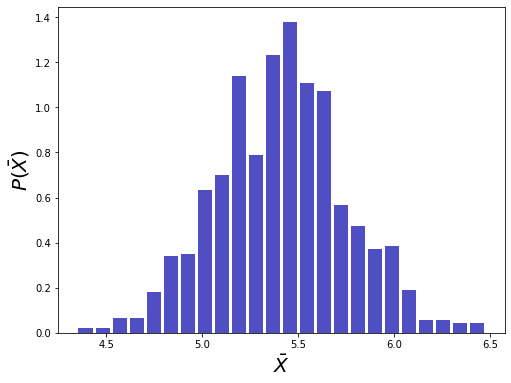

Media das amostras: 5.414375 Media da população: 5.4


In [94]:
n = 40
ns = 1000 #numero de simulacoes
vx = [] # armazena a media amostral
for s in range(0,ns):
    A = np.random.choice(X, n, p=P)
    vx.append(np.mean(A))
plt.figure(figsize=(8,6))
plt.hist(x=vx, bins='auto',color='#0504aa', alpha=0.7, rwidth=0.85, density = True)
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show(True)    
print("Media das amostras:", np.mean(vx), "Media da população:", E)

A probabilidade de ser maior do que 5:

In [95]:
nmaior = 0
for i in range(0, len(vx)):
    if(vx[i] > 5):
        nmaior = nmaior + 1
nmaior = nmaior/len(vx)
print("Probabilidade de ser maior do que 5:", nmaior, "Valor teórico:", 0.88)

Probabilidade de ser maior do que 5: 0.882 Valor teórico: 0.88
